In [186]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

# Source: https://en.wikipedia.org/wiki/Fourier_transform
def fourier1d(signal: np.ndarray) -> np.ndarray:
    n = len(signal)
    fourier = np.zeros(n, dtype=complex)
    for xi in range(n):
        for x, f_of_x in enumerate(signal):
            x_prime = x / n
            fourier[xi] += f_of_x * np.exp(-2j*np.pi*x_prime*xi)
    return fourier

def inverse_fourier1d(fourier: np.ndarray) -> np.ndarray:
    n = len(fourier)
    signal = np.zeros(n, dtype=complex)
    for x in range(n):
        for xi, g_of_xi in enumerate(fourier):
            xi_prime = xi / n
            signal[x] += g_of_xi * np.exp(2j*np.pi*x*xi_prime) # note the sign
    return np.real(signal) / n # no idea why this division is needed

test_signal = np.array([1, 2, 3, 4, 5, 6, 7, 8])
fourier = fourier1d(test_signal)
inverse_fourier = inverse_fourier1d(fourier)
assert np.allclose(test_signal, inverse_fourier)
assert np.allclose(np.fft.fft(test_signal), fourier)
assert np.allclose(np.fft.ifft(fourier), inverse_fourier)

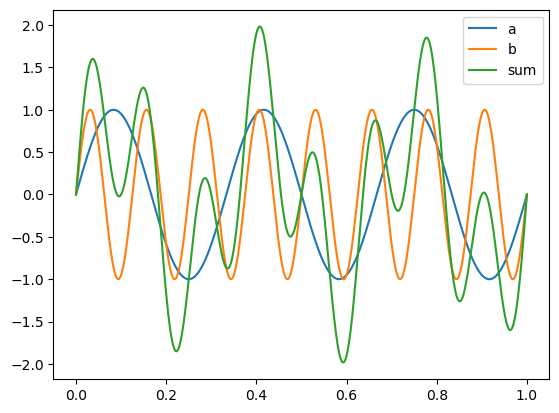

In [112]:
def generate_wave(f: int, signal_len_s: int = 1, sample_rate: int = 1000) -> List[np.ndarray]:
    x = np.linspace(0, signal_len_s, sample_rate*signal_len_s)
    y = np.sin(np.linspace(0, 2*np.pi*f*signal_len_s, sample_rate*signal_len_s))
    return x, y

x, signal_a = generate_wave(3)
_, signal_b = generate_wave(8)
signal_sum = signal_a + signal_b
plt.plot(x, signal_a)
plt.plot(x, signal_b)
plt.plot(x, signal_sum)
plt.legend(['a', 'b', 'sum'])
plt.show()

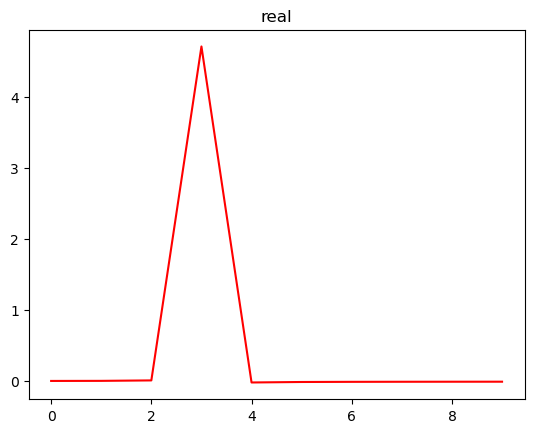

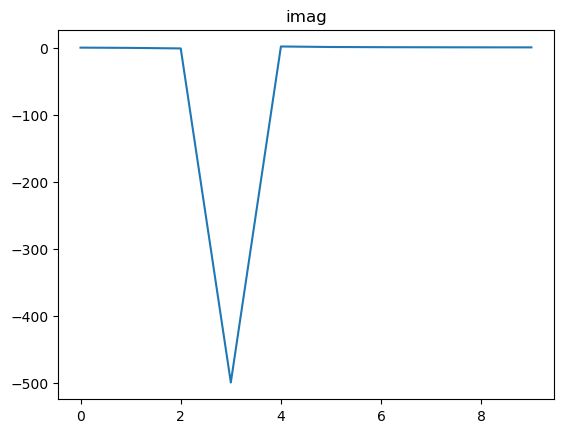

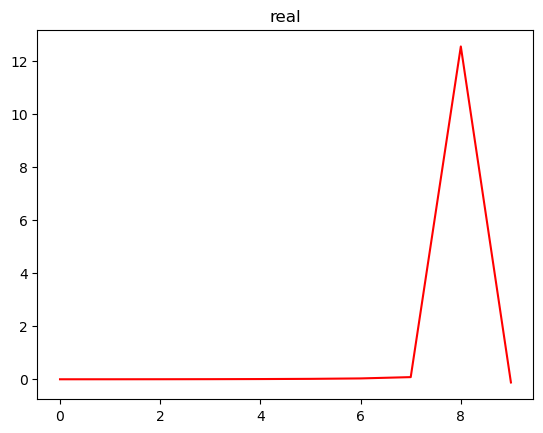

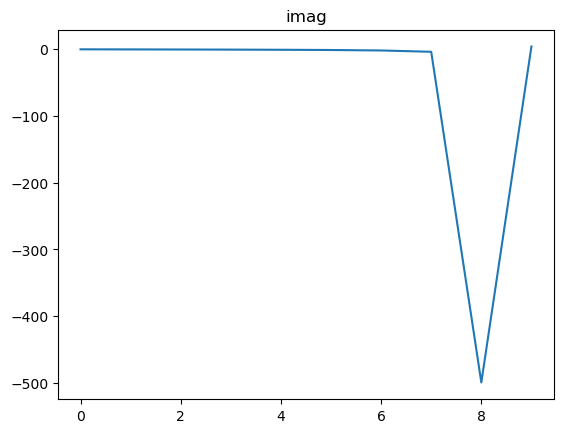

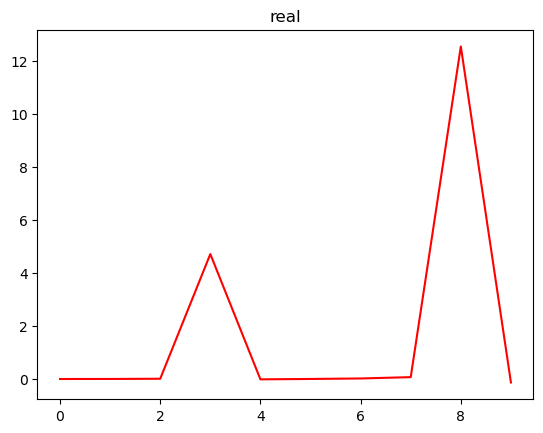

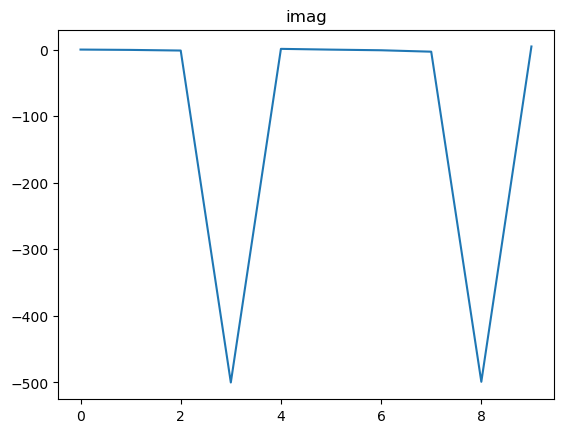

In [209]:
def plot_fourier1d(signal: np.ndarray):
    fourier = fourier1d(signal)
    real = np.real(fourier)
    imag = np.imag(fourier)
    plt.plot(real[:10], color='red')
    plt.title('real')
    plt.show()
    plt.plot(imag[:10])
    plt.title('imag')
    plt.show()

plot_fourier1d(signal_a)
plot_fourier1d(signal_b)
plot_fourier1d(signal_sum)

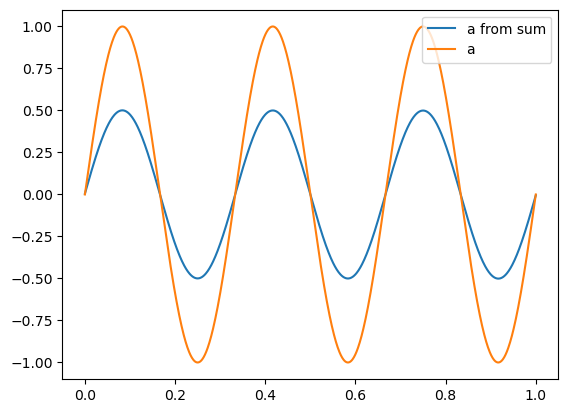

In [131]:
def lpf1d(signal: np.ndarray, max_freq: int) -> np.ndarray:
    fourier = fourier1d(signal)
    fourier[max_freq+1:] = 0
    return inverse_fourier1d(fourier)

signal_a_from_sum = lpf1d(signal_sum, max_freq=5)
plt.plot(x, signal_a_from_sum)
plt.plot(x, signal_a)
plt.legend(['a from sum', 'a'])
plt.show()

/usr/local/anaconda3/envs/playground/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


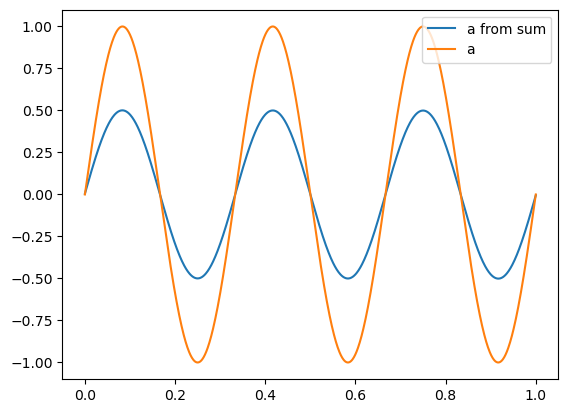

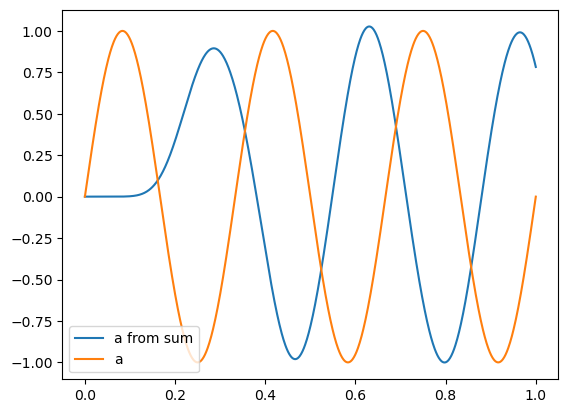

In [137]:
# use existing impl
from scipy import signal as sgn

def existing_lpf1d(signal: np.ndarray, max_freq: int) -> np.ndarray:
    fourier = np.fft.fft(signal)
    fourier[max_freq+1:] = 0
    return np.fft.ifft(fourier)

def better_existing_lpf1d(signal: np.ndarray, max_freq: int) -> np.ndarray:
    sos = sgn.butter(10, max_freq, 'lp', fs=1000, output='sos')
    return sgn.sosfilt(sos, signal)

signal_a_from_sum = existing_lpf1d(signal_sum, max_freq=5)
plt.plot(x, signal_a_from_sum)
plt.plot(x, signal_a)
plt.legend(['a from sum', 'a'])
plt.show()

signal_a_from_sum = better_existing_lpf1d(signal_sum, max_freq=5)
plt.plot(x, signal_a_from_sum)
plt.plot(x, signal_a)
plt.legend(['a from sum', 'a'])
plt.show()

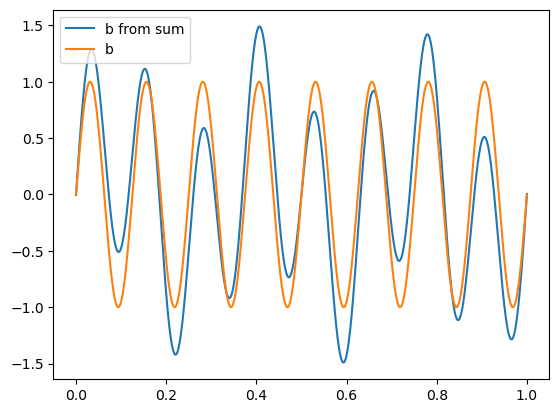

In [138]:
def hpf1d(signal: np.ndarray, min_freq: int) -> np.ndarray:
    fourier = fourier1d(signal)
    fourier[:min_freq] = 0
    return inverse_fourier1d(fourier)

signal_b_from_sum = hpf1d(signal_sum, min_freq=6)
plt.plot(x, signal_b_from_sum)
plt.plot(x, signal_b)
plt.legend(['b from sum', 'b'])
plt.show()

In [187]:
# Source: https://eeweb.engineering.nyu.edu/~yao/EL5123/lecture4_2DFT.pdf
def fourier2d(signal: np.ndarray) -> np.ndarray:
    n1 = signal.shape[0]
    n2 = signal.shape[1]
    fourier = np.zeros((n1, n2), dtype=complex)
    for xi in range(n1):
        for yi in range(n2):
            for x, f_of_x in enumerate(signal):
                for y, f_of_y in enumerate(f_of_x):
                    x_prime = x / n1
                    y_prime = y / n2
                    fourier[xi, yi] += f_of_y * np.exp(-2j*np.pi*(x_prime*xi + y_prime*yi))
    return fourier
    
def inverse_fourier2d(fourier: np.ndarray) -> np.ndarray:
    n1 = fourier.shape[0]
    n2 = fourier.shape[1]
    signal = np.zeros((n1, n2), dtype=complex)
    for x in range(n1):
        for y in range(n2):
            for xi, g_of_xi in enumerate(fourier):
                for yi, g_of_yi in enumerate(g_of_xi):
                    xi_prime = xi / n1
                    yi_prime = yi / n2
                    signal[x, y] += g_of_yi * np.exp(2j*np.pi*(x*xi_prime + y*yi_prime)) # note the sign
    return np.real(signal) / (n1*n2) # no idea why this division is needed

test_signal = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
fourier = fourier2d(test_signal)
inverse_fourier = inverse_fourier2d(fourier)
assert np.allclose(test_signal, inverse_fourier)
assert np.allclose(np.fft.fft2(test_signal), fourier)
assert np.allclose(np.fft.ifft2(fourier), inverse_fourier)

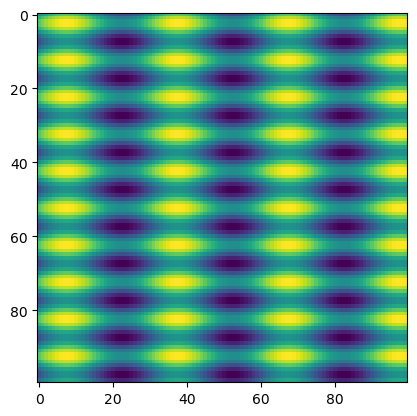

In [197]:
image_made_of_sines = np.zeros((100, 100))
for x in range(image_made_of_sines.shape[0]):
    for y in range(image_made_of_sines.shape[1]):
        image_made_of_sines[x, y] = np.sin(2*np.pi*x/10) + np.sin(2*np.pi*y/30)
plt.imshow(image_made_of_sines)
plt.show()

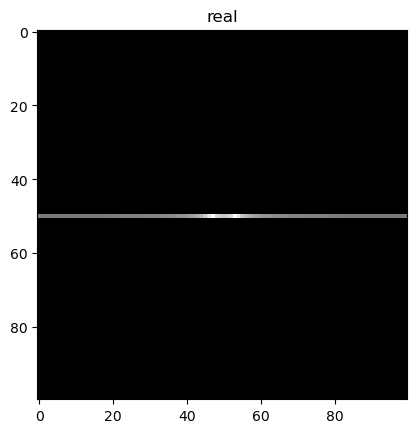

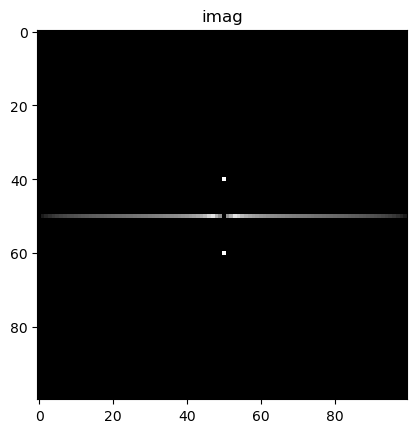

In [224]:
def plot_fourier2d(signal: np.ndarray):
    fourier = np.fft.fft2(signal) # own impl is too slow
    # shift the zero-frequency component to the center of the spectrum
    fourier = np.fft.fftshift(fourier)
    real = np.real(fourier)
    imag = np.imag(fourier)
    
    # increase contrast
    real = np.log(np.abs(real) + 1)
    imag = np.log(np.abs(imag) + 1)
    
    plt.imshow(real, cmap='gray')
    plt.title('real')
    plt.show()
    plt.imshow(imag, cmap='gray')
    plt.title('imag')
    plt.show()
    
plot_fourier2d(image_made_of_sines)

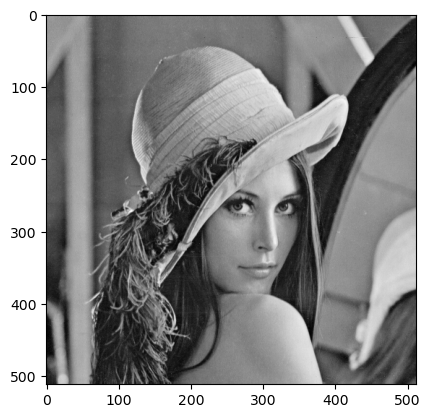

In [225]:
image = plt.imread('images/lena.png')
# convert to grayscale
image = np.mean(image, axis=2)
plt.imshow(image, cmap='gray')
plt.show()

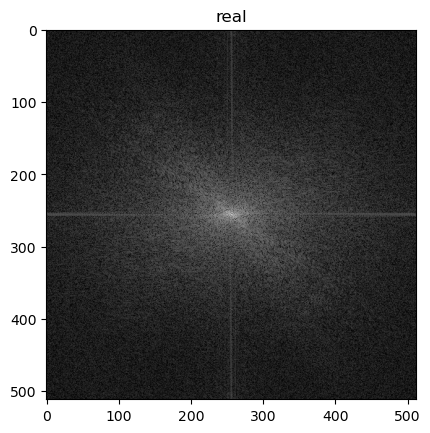

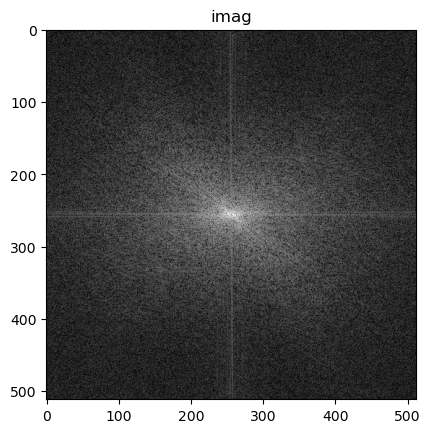

In [226]:
plot_fourier2d(image)


In [ ]:
# For more, see https://www.physi.uni-heidelberg.de/Einrichtungen/AP/python/FFT_lena.html